# Вариант 11

Подобрать коэффициенты аппроксимирующей функции на основе таблицы. Использовать функции типа $\sum^{k}_{i=1} u_i sin(ix)$, k={1,2,3}, . Построить графики аппроксимирующих функций и сравнить с табличными значениями. Подобрать наилучшую аппроксимацию с помощью проверки среднеквадратического отклонения.

Введем исходные данные:

In [1]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
χ = range(0, 10, 200) # Набор "непрерывных" значений для графикоф функций
y = [0, 0.3, 1.74, 0.4, -1.74, -0.74, 0.09, 0.01, 1.46, 1.12, -1.41]

11-element Vector{Float64}:
  0.0
  0.3
  1.74
  0.4
 -1.74
 -0.74
  0.09
  0.01
  1.46
  1.12
 -1.41

Для веполнения задания нам требуется пара методов из прошлых лабораторных работ: скалярное произведение и решение системы линейных уранений методом Гаусса.

In [2]:
function dot(x, y) # Скалярное произведение
    z = @. x * y
    return sum(z)
end

dot (generic function with 1 method)

In [3]:
function Gauss(A,f)
    n = Int(sqrt(length(A)))
    # Прямой ход
    for i ∈ 1:n-1
        for j ∈ i+1:n
            q = A[j, i]/A[i, i]
            A[j, :] -= @. A[i, :] * q
            f[j] -= f[i] * q
        end
    end
    # Обратный ход
    x = Vector{Float64}(undef, n)
    x[n] = f[n] / A[n, n]
    for k ∈ reverse(1:n-1)
        x[k] = (f[k] - sum([A[k, j] * x[j] for j ∈ k+1:n]))/A[k, k]
    end
    return x
end

Gauss (generic function with 1 method)

На всякий случай проверм, что метод Гаусса работает как положено.

In [4]:
# Матрица и правая часть ил Лабораторной работы 1.
A = Matrix([-8.3 1.27 -2.7 2.91 -1.05; 
1.27 12.6 3.09 -1.2 1.21;
 -2.7 3.09 -9.26 3.02 0.0;
2.91 -1.2 3.02 -11.8 1.66;
-1.05 1.21 0.0 1.66 7.51])


f = Vector([28.58, 21.9, 36.53, -44.45, -29.55])

5-element Vector{Float64}:
  28.58
  21.9
  36.53
 -44.45
 -29.55

In [5]:
ans = Gauss(A, f)

println("$(A * ans) = $f")

if A * ans ≈ f 
    print("Сошлось!")
else
    print("Не сошлось.")
end

[28.58, 26.2730843373494, 21.735957328597298, -27.456051485495667, -38.72523974931387] = [28.58, 26.273084337349395, 21.735957328597298, -27.456051485495667, -38.72523974931387]


Сошлось!

## Метод наименьших квадратов

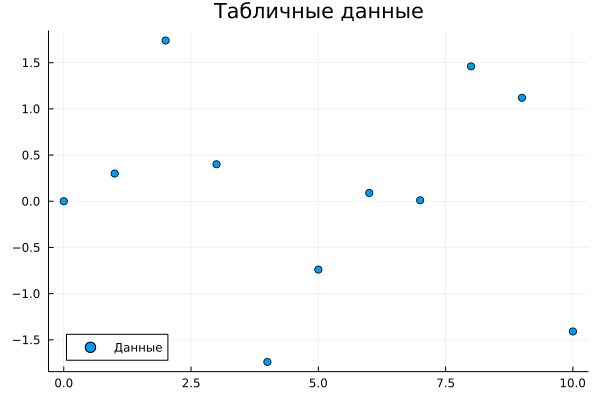

In [6]:
using Plots

G1 = scatter(x, y, title="Табличные данные", label="Данные")

Дан некторый датасет, который мы должны аппроксимировать кривой функции. Один из методов позваоляющх это сделать --- $\textbf{Метод наименьших квадратов}$ (МНК).

\begin{equation*}
    \sum\limits_{i=1}^{k} u_i \varphi_i(x) \approx f(x)
\end{equation*}

Представляем f (датасет) как фунцию, определённую только в заданных точках х. (Соответственно "скалярным произведением" будет произведение значений фкукций в этих точках) По условию задачи $\varphi(x) = sin(ix)$.

Его основная идея --- минимизирвать сумму квадратов разностей между исходным датачетом и апрроксимируещей функцией; этот минимум находится с помощью обязательного (равенство нулю всех частных производных) и достаточного (положительность всех вторых чпстных производных) условия локального минимума.
В нашем случае, с нелинейной функцией и переопределённой системой, МНК приобретает следующий вид:

\begin{cases}
    \sum\limits_{i=1}^{k} u_i (\varphi_1, \varphi_i) = (f, \varphi_1) \\
    \sum\limits_{i=1}^{k} u_i (\varphi_2, \varphi_i) = (f, \varphi_2) \\
    ............................................ \\
    \sum\limits_{i=1}^{k} u_i (\varphi_k, \varphi_i) = (f, \varphi_k)
\end{cases}

Подставим наши функции:

\begin{cases}
    \sum\limits_{i=1}^{k} u_i (sin(ix), sinx) = (f, sinx) \\
    \sum\limits_{i=1}^{k} u_i (sin(ix), sin(2x)) = (f, sin(2x)) \\
    ............................................ \\
    \sum\limits_{i=1}^{k} u_i (sin(ix), sin(kx)) = (f, sin(kx))
\end{cases}

Эту систему уравнений мы можем решать как любую другую.
\begin{cases}
    M = \left(\begin{array}{ccc}
        (sinx, sinx) & \ldots & (sinx, sin(kx)) \\
        \ldots & \ldots & \ldots \\
        (sin(kx), sinx) & \ldots & (sin(kx), sin(kx))
    \end{array}\right) \\
    U = \left(\begin{array}{c}
        u_1
        \ldots
        u_k
    \end{array}\right)^T \\
    F = \left(\begin{array}{c} 
        (f, sinx)
        \ldots
        (f, sin(kx))
    \end{array}\right)^T
\end{cases}

### В случае $k=1$ имеем просто:

\begin{equation*}
    u (sinx, sinx) = (f, sinx)
\end{equation*}

In [7]:
u = [dot(y, sin.(x)) / dot(sin.(x), sin.(x))] 

1-element Vector{Float64}:
 1.3140310421327666

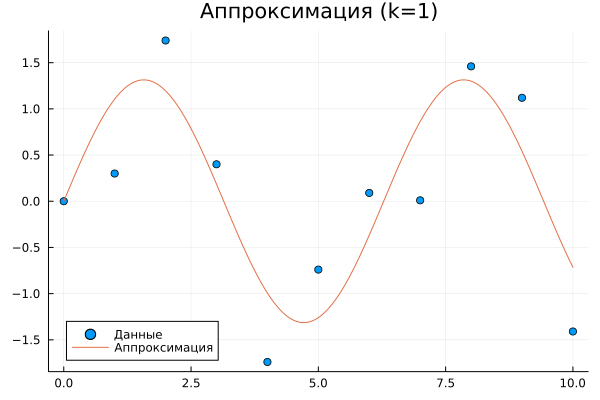

In [8]:
G2 = scatter(x, y, title="Аппроксимация (k=1)", label="Данные")
plot!(χ, @. u*sin(χ); label="Аппроксимация")
G2

### Для больших значений $k$ будем использовать метод гаусса:

In [9]:
function Lsq(k) # Метод наименьшх квадратов, возвращает коэфииценты u_i
    M = Matrix{Float64}(undef, k, k)
    F = Vector{Float64}(undef, k)
    for j ∈ 1:k
        for i ∈ 1:k
            M[j, i] = dot(sin.(j*x), sin.(i*x))
        end
    F[j] = dot(y, sin.(j*x))
    end
    U = Gauss(M, F) 
    return U
end

function graph(U) # Создает множество значений для графика, используя коэффиценты из МНК
    ans = Vector{Float64}(undef, length(χ))
    for i ∈ 1:length(U)
        ans += U[i] * sin.(i*χ)
    end
    return ans
end

function S(U) # Считает среднеквадратческое отклонение данной имплементации МНК
    ans = 0
    k = length(U)
    n = length(x)
    func = Vector{Float64}(undef, n)
    for i ∈ 1:k 
        func += U[i] * sin.(i*x)
    end
    for i ∈ 1:n 
        ans += (y[i] - func[i]) ^ 2
    end
    return ans / n
end

S (generic function with 1 method)

In [10]:
S(u) # Проверяем среднекваодратическое отклонение, в первую очереди для k = 1

0.3272038053448345

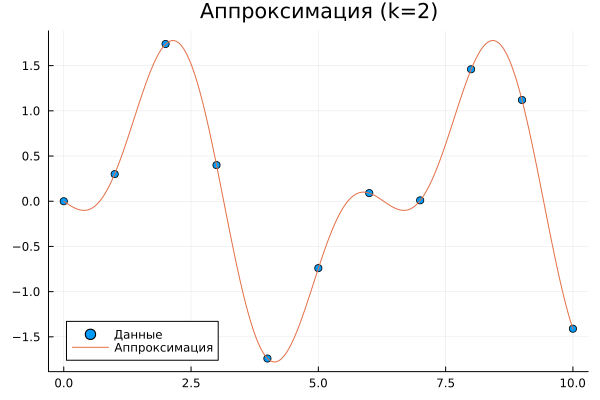

In [11]:
us = Lsq(2)
G3 = scatter(x, y, title="Аппроксимация (k=2)", label="Данные")
plot!(χ, graph(us), label="Аппроксимация")
G3

In [12]:
S(us)

4.725738662956003e-6

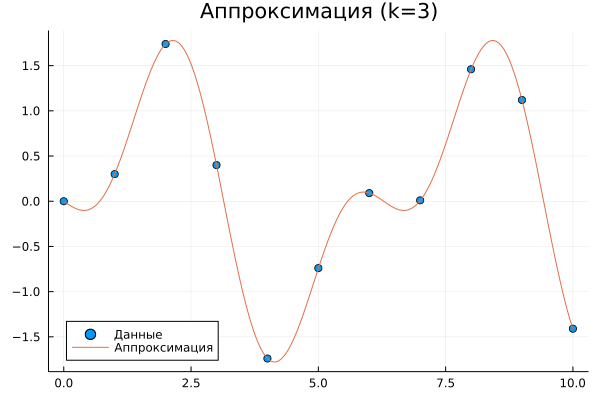

In [13]:
us = Lsq(3)
G4 = scatter(x, y, title="Аппроксимация (k=3)", label="Данные")
plot!(χ, graph(us), label="Аппроксимация")
G4

In [14]:
S(us)

NaN

Как нетрудно заметить, наименьшее отклонение достигается при наибольшем $k$.

### Значения $k > 3$

S(k=4) = 2.3767699232916005e-6
S(k=5) = 0.45427262957795195
S(k=6) = 0.49929232930829975
S(k=7) = 1.2655693444681648e-6


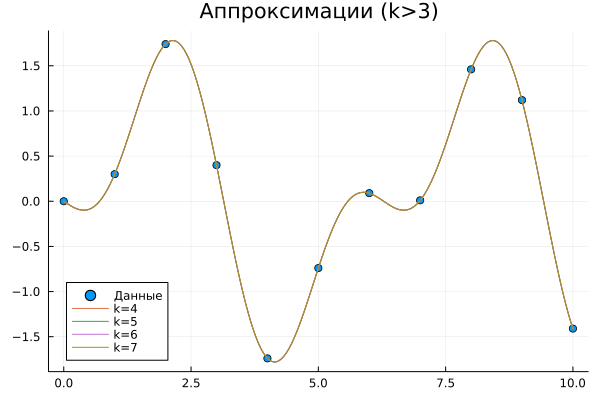

In [21]:
G5 = scatter(x, y, title="Аппроксимации (k>3)", label="Данные")
for i ∈ 4:7
    us = Lsq(i)
    plot!(χ, graph(us), label="k=$i")
    println("S(k=$i) = $(S(us))")
end
G5

При дальнейшем росте k, отклонение продолжает убывать.

Однако, с увелечением $k$ ухудшается обусловленность системы. Вследствие этого, одна и та же программа может выдавать разные данные, из-за вычислительных ошибок на ЭВМ.

S(k=4) = 145.65518263832908
S(k=5) = Inf
S(k=6) = 857.0448842682137
S(k=7) = 1.2655693444681648e-6


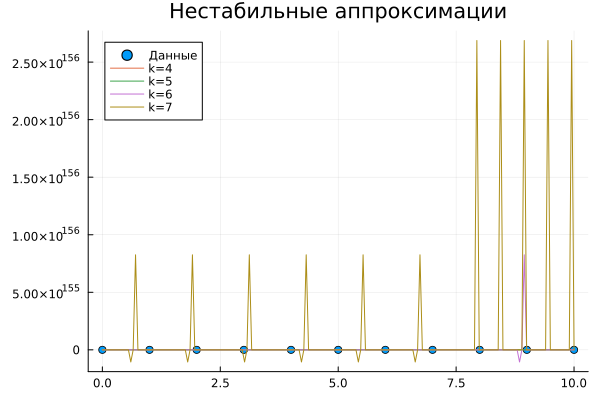

In [27]:
G6 = scatter(x, y, title="Нестабильные аппроксимации", label="Данные")
for i ∈ 4:7
    us = Lsq(i)
    plot!(χ, graph(us), label="k=$i")
    println("S(k=$i) = $(S(us))")
end
G6